# Warning!
![Warning](images/learner-discretion-advised.png)

<img src="images/1st-base.png"
     width="50%"/>

## Read from a database

- Python as the "glue that binds" (_interoperability_)
- Work programatically with _metadata_ 

In [1]:
# There's a package for that!
import sqlite3
import pandas as pd
import seaborn as sns
import os

In [2]:
# Is this a file?
os.path.isfile('datasets/lahman.sqlite')

True

In [3]:
# Connect to the database
con = sqlite3.connect('datasets/lahman.sqlite')

In [4]:
# Write tables out to a DataFrame
table_query = "SELECT name FROM sqlite_master WHERE type='table';"

Want a static list of all tables in a database? 
Good luck doing this with a BI tool!

In [5]:
list_tables = pd.read_sql_query(table_query, con)
list_tables.head()

,name
0,allstarfull
1,appearances
2,awardsmanagers
3,awardsplayers
4,awardssharemanagers


The `salaries` table is one that we'll need to perform our analysis.


We will use basic SQL to communicate with the database. 

In [6]:
salary_query = 'SELECT * FROM salaries;'
salaries = pd.read_sql_query(salary_query, con)
salaries.head()

,ID,yearID,teamID,team_ID,lgID,playerID,salary
0,1,1985,ATL,1918,NL,barkele01,870000.0
1,2,1985,ATL,1918,NL,bedrost01,550000.0
2,3,1985,ATL,1918,NL,benedbr01,545000.0
3,4,1985,ATL,1918,NL,campri01,633333.0
4,5,1985,ATL,1918,NL,ceronri01,625000.0


This is good information, but who **are** the players and teams? It's hard to know based solely on the unique IDs.

That information can be found in _other_ tables of the database:


<img src="images/lookups.png"
     width="40%"/>


Let's read those in now...

In [7]:
# Read in teams table
teams_query = 'SELECT * FROM teams;'
teams = pd.read_sql_query(teams_query, con)
teams.head()

,ID,yearID,lgID,teamID,franchID,divID,div_ID,teamRank,G,Ghome,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1,1871,NA,BS1,BNA,None,NaN,3,31,NaN,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,2,1871,NA,CH1,CNA,None,NaN,2,28,NaN,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,3,1871,NA,CL1,CFC,None,NaN,8,29,NaN,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,4,1871,NA,FW1,KEK,None,NaN,7,19,NaN,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,5,1871,NA,NY2,NNA,None,NaN,5,33,NaN,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [8]:
# Read in people table
people_query = 'SELECT * FROM people;'
people = pd.read_sql_query(people_query, con)
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,birth_date,debut_date,finalgame_date,death_date
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,1981-12-27,2004-04-06,2015-08-23,None
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,1934-02-05,1954-04-13,1976-10-03,None
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1939-08-05,1962-04-10,1971-09-26,1984-08-16
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,R,R,1977-07-26,1990-10-03,aased001,aasedo01,1954-09-08,1977-07-26,1990-10-03,None
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,L,L,2001-09-10,2006-04-13,abada001,abadan01,1972-08-25,2001-09-10,2006-04-13,None


## Questions about importing data?

Now let's move to profiling...

<img src="images/2nd-base.png"
     width="50%"/>

- What kinds of questions can we answer with the data?
- What needs to be done to answer those questions? (3rd Base)

Profiling can lead naturally into analysis...

In [9]:
# Why do some of these columns have more nulls than others? 
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerID        19878 non-null  object 
 1   birthYear       19763 non-null  float64
 2   birthMonth      19594 non-null  float64
 3   birthDay        19452 non-null  float64
 4   birthCountry    19816 non-null  object 
 5   birthState      19340 non-null  object 
 6   birthCity       19704 non-null  object 
 7   deathYear       9757 non-null   float64
 8   deathMonth      9756 non-null   float64
 9   deathDay        9755 non-null   float64
 10  deathCountry    9755 non-null   object 
 11  deathState      9706 non-null   object 
 12  deathCity       9750 non-null   object 
 13  nameFirst       19841 non-null  object 
 14  nameLast        19878 non-null  object 
 15  nameGiven       19841 non-null  object 
 16  weight          19060 non-null  float64
 17  height          19141 non-null 

In [10]:
# What percent of each column are missing?
people.isnull().mean().sort_values(ascending=False)

deathState        0.511722
deathCity         0.509508
death_date        0.509256
deathDay          0.509256
deathCountry      0.509256
deathMonth        0.509206
deathYear         0.509156
bats              0.059513
throws            0.049150
weight            0.041151
height            0.037076
birthState        0.027065
birth_date        0.021431
birthDay          0.021431
birthMonth        0.014287
finalGame         0.009860
debut             0.009860
debut_date        0.009860
finalgame_date    0.009860
birthCity         0.008753
birthYear         0.005785
birthCountry      0.003119
retroID           0.002817
nameGiven         0.001861
nameFirst         0.001861
bbrefID           0.000101
playerID          0.000000
nameLast          0.000000
dtype: float64

In [11]:
# Descriptive statistics
people.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,19763.000000,19594.000000,19452.000000,9757.000000,9756.000000,9755.000000,19060.000000,19141.000000
mean,1933.768304,6.627080,15.630681,1965.759250,6.491287,15.540543,187.167104,72.326629
std,42.485357,3.466562,8.757199,32.678973,3.532180,8.779454,21.944565,2.612004
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1896.000000,4.000000,8.000000,1943.000000,3.000000,8.000000,170.000000,71.000000
50%,1941.000000,7.000000,16.000000,1968.000000,6.000000,15.000000,185.000000,72.000000
75%,1972.000000,10.000000,23.000000,1993.000000,10.000000,23.000000,200.000000,74.000000
max,2000.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,320.000000,83.000000


In [12]:
# What is the average player height?
people['height'].mean()

72.3266287027846

In [13]:
# What is the earliest birthyear on file?



### What questions do you have about the data?

Let's try to answer it now!

#### Don't forget dataviz

Data visualization is _not_ a separate or optional part of data analysis!

With the `seaborn` package we can use functions to build plots, with a few arguments:

`x`: What goes on the X axis?  
`y`: What goes on the Y axis?  
`data`: Where does the data come from?  

<AxesSubplot:xlabel='height', ylabel='weight'>

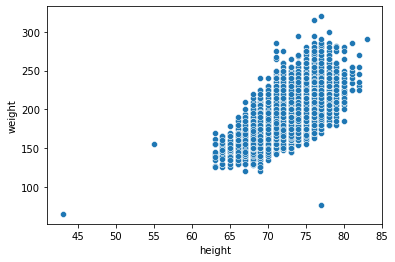

In [14]:
# Scatterplot of height vs weight
sns.scatterplot(x='height', y='weight', data=people)

Who are the outliers? Let's take a look....

In [15]:
people.query('(height < 60) or (weight < 100)')

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,birth_date,debut_date,finalgame_date,death_date
6065,gaedeed01,1925.0,6.0,8.0,USA,IL,Chicago,1961.0,6.0,18.0,...,R,L,1951-08-19,1951-08-19,gaede101,gaedeed01,1925-06-08,1951-08-19,1951-08-19,1961-06-18
7637,healeto01,1853.0,NaN,NaN,USA,RI,Cranston,1891.0,2.0,6.0,...,None,R,1878-06-13,1878-09-09,healt101,healeto01,None,1878-06-13,1878-09-09,1891-02-06
17038,stallja01,1989.0,12.0,22.0,USA,KS,Lawrence,NaN,NaN,NaN,...,R,R,2016-06-19,2019-09-29,stalj001,stallja01,1989-12-22,2016-06-19,2019-09-29,None


We probably don't know who these players are based on their IDs... you'll learn how to do that soon.

We can make a countplot (bar chart) with the `countplot()` function...

<AxesSubplot:xlabel='bats', ylabel='count'>

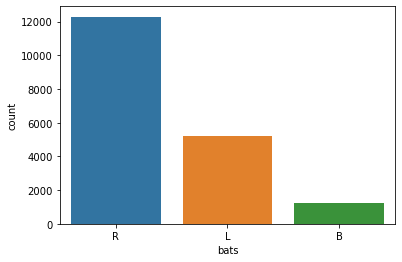

In [16]:
sns.countplot(x='bats', data=people)

In [17]:
# Create a countplot of number of records by "throws." 



Our ultimate question is whether there's a relationship between a team's payroll and its total attendance for the year. It will take some data manipulation to answer that question:

1. Get the total annual sum of salaries for each team
2. "Look up" the team ID's from the `teams` table

These steps would look like this in Excel:


<img src="images/payroll-steps.png"
     width="75%"/>

Let's do this in Python...

In [18]:
# Get the sum of salary for each year & team
payroll = salaries.groupby(['yearID', 'teamID'], as_index=False)['salary'].sum()
payroll.head()

,yearID,teamID,salary
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0


In [19]:
teams.shape

(2925, 50)

`teams` has a *lot* of columns, so we only want some of them...

In [20]:
payroll_merged = payroll.merge(teams[['yearID','teamID','name','attendance', 'W']], how='left')
payroll_merged.head()

,yearID,teamID,salary,name,attendance,W
0,1985,ATL,14807000.0,Atlanta Braves,1350137.0,66
1,1985,BAL,11560712.0,Baltimore Orioles,2132387.0,83
2,1985,BOS,10897560.0,Boston Red Sox,1786633.0,81
3,1985,CAL,14427894.0,California Angels,2567427.0,90
4,1985,CHA,9846178.0,Chicago White Sox,1669888.0,85


In [21]:
# Sanity check -- did we lose any records?
payroll.shape[0] == payroll_merged.shape[0]

True

## What questions do you have so far? 

Now let's move to the actual analysis...

<img src="images/3rd-base.png"
     width="50%"/>

## Payroll versus attendance

Is there a relationship?

While we could use statistical methods like _linear regression_ to find out, visualization is a great place to start. We will use the `scatterplot()` function:

<AxesSubplot:xlabel='salary', ylabel='attendance'>

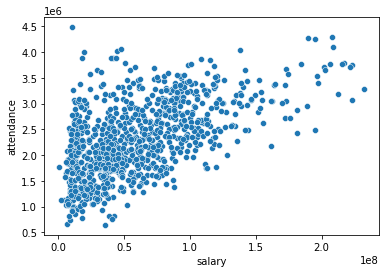

In [22]:
sns.scatterplot(x='salary', y='attendance', data=payroll_merged)

<AxesSubplot:xlabel='salary', ylabel='attendance'>

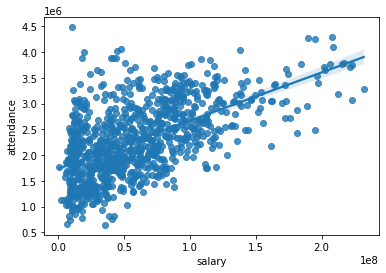

In [23]:
# Is there a relationship? 
sns.regplot(x='salary', y='attendance', data=payroll_merged)

### What are we _not_ considering with this relationship?

- Should we [adjust for inflation](https://medium.com/@alvaro.henriquez/adjusting-for-inflation-in-pandas-9cffc0d888ac)?
- Should we [adjust for population from the census](https://towardsdatascience.com/accessing-census-data-with-python-3e2f2b56e20d)?
- What about stadium sizes? Use % capacity?

#### What else could be contributing to or skewing this relationship?

Is there a relationship between payroll and wins?

<AxesSubplot:xlabel='salary', ylabel='W'>

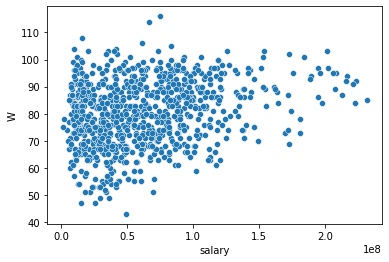

In [24]:
sns.scatterplot(x='salary', y='W', data=payroll_merged)

In [25]:
# Add the regplot?

## Home plate... export to Excel

<img src="images/home-plate.png"
     width="50%"/>
 
For better or worse, not everyone you'll likely work with will be fluent in Python! So let's look at creating a polished team payroll report in Excel using just Python. We will make use of the `xlsxwriter` package to do this.

In [26]:
# Dump out data to Excel... NO FORMATTING
payroll_merged.to_excel('output/payroll-pandas.xlsx')

Now we will write the data out to Excel, format it and add a chart. 

The code here is a little more exotic, but keep the end in mind -- we are *creating an Excel report without even needing to open Excel!*

In [27]:
# Keep only some columns
payroll_report = payroll_merged.drop(columns=['teamID'])
payroll_report.head()

,yearID,salary,name,attendance,W
0,1985,14807000.0,Atlanta Braves,1350137.0,66
1,1985,11560712.0,Baltimore Orioles,2132387.0,83
2,1985,10897560.0,Boston Red Sox,1786633.0,81
3,1985,14427894.0,California Angels,2567427.0,90
4,1985,9846178.0,Chicago White Sox,1669888.0,85


In [28]:
# Rename them as well, more user-friendly
payroll_report.columns = ['year', 'payroll', 'name', 'attendance', 'wins']
payroll_report.head()

,year,payroll,name,attendance,wins
0,1985,14807000.0,Atlanta Braves,1350137.0,66
1,1985,11560712.0,Baltimore Orioles,2132387.0,83
2,1985,10897560.0,Boston Red Sox,1786633.0,81
3,1985,14427894.0,California Angels,2567427.0,90
4,1985,9846178.0,Chicago White Sox,1669888.0,85


In [29]:
import xlsxwriter 

# 1. Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('output/payroll-xlswriter.xlsx', engine='xlsxwriter')

# 2. Convert the dataframe to an XlsxWriter Excel object
payroll_report.to_excel(writer, sheet_name='Sheet1', index=False)

# 3. Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Add number and currency formats 
thousands_format = workbook.add_format({'num_format':'#,##0'})
currency_format = currency_format = workbook.add_format({'num_format':'$#,##0'})

# Re-format columns
worksheet.set_column('B:B', 12, currency_format) # Widen team name column, keep format
worksheet.set_column('C:C', 19) # Widen payroll column, use currency format 
worksheet.set_column('D:D', 12, thousands_format)  # Widen attendance column, use thousands format 

0

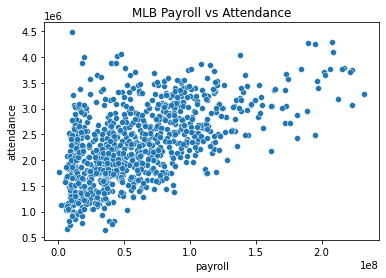

In [30]:
# Now let's add the chart...

import matplotlib.pyplot as plt  # Add chart title

sns.scatterplot(x='payroll', y='attendance', data=payroll_report)
plt.title('MLB Payroll vs Attendance')

# Save the image
plt.savefig('output/payroll.png', dpi = (300))

# Add the image to the workbook
worksheet.insert_image('G1', 'output/payroll.png')

# Close workbook
workbook.close()

## What questions do you have?